In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!echo '{"username":"<KAGGLE_USERNAME>","key":"<KAGGLE_KEY>"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d denkuznetz/food-delivery-time-prediction
!unzip food-delivery-time-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/denkuznetz/food-delivery-time-prediction
License(s): apache-2.0
  0% 0.00/11.6k [00:00<?, ?B/s]
100% 11.6k/11.6k [00:00<00:00, 23.3MB/s]
Archive:  food-delivery-time-prediction.zip
  inflating: Food_Delivery_Times.csv  


In [ ]:
data = pd.read_csv('Food_Delivery_Times.csv')
data.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


from matplotlib import pyplot as plt
_df_0['Order_ID'].plot(kind='hist', bins=20, title='Order_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Distance_km'].plot(kind='hist', bins=20, title='Distance_km')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Preparation_Time_min'].plot(kind='hist', bins=20, title='Preparation_Time_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Courier_Experience_yrs'].plot(kind='hist', bins=20, title='Courier_Experience_yrs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Traffic_Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Time_of_Day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Vehicle_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Order_ID', y='Distance_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Distance_km', y='Preparation_Time_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Preparation_Time_min', y='Courier_Experience_yrs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Courier_Experience_yrs', y='Delivery_Time_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_of_Day']
  ys = series['Order_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Time_of_Day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_of_Day')
_ = plt.ylabel('Order_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_of_Day']
  ys = series['Order_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Time_of_Day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Traffic_Level')):
  _plot_series(series, series_name, i)
  fig.legend(title='Traffic_Level', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_of_Day')
_ = plt.ylabel('Order_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_of_Day']
  ys = series['Order_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Time_of_Day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Time_of_Day')):
  _plot_series(series, series_name, i)
  fig.legend(title='Time_of_Day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_of_Day')
_ = plt.ylabel('Order_ID')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time_of_Day']
  ys = series['Order_ID']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Time_of_Day', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Vehicle_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Vehicle_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time_of_Day')
_ = plt.ylabel('Order_ID')

from matplotlib import pyplot as plt
_df_16['Order_ID'].plot(kind='line', figsize=(8, 4), title='Order_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Distance_km'].plot(kind='line', figsize=(8, 4), title='Distance_km')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Preparation_Time_min'].plot(kind='line', figsize=(8, 4), title='Preparation_Time_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Courier_Experience_yrs'].plot(kind='line', figsize=(8, 4), title='Courier_Experience_yrs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Traffic_Level'].value_counts()
    for x_label, grp in _df_20.groupby('Weather')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Weather')
_ = plt.ylabel('Traffic_Level')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Time_of_Day'].value_counts()
    for x_label, grp in _df_21.groupby('Traffic_Level')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Traffic_Level')
_ = plt.ylabel('Time_of_Day')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Vehicle_Type'].value_counts()
    for x_label, grp in _df_22.groupby('Time_of_Day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time_of_Day')
_ = plt.ylabel('Vehicle_Type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Order_ID', y='Weather', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Traffic_Level'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Order_ID', y='Traffic_Level', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Time_of_Day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Order_ID', y='Time_of_Day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Vehicle_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Order_ID', y='Vehicle_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
print(data.dtypes)  # Verinizdeki sütunların türlerini kontrol edin


Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object


In [ ]:
# Sayısal sütunları seçme
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Kategorik sütunları seçme
categorical_data = data.select_dtypes(include=['object'])


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Sayısal sütunlara medyan stratejisini uygulama
numeric_imputer = SimpleImputer(strategy='median')
numeric_data = pd.DataFrame(
    numeric_imputer.fit_transform(numeric_data),
    columns=numeric_data.columns
)


In [ ]:
# Kategorik sütunlara en sık görülen değerle doldurma
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_data = pd.DataFrame(
    categorical_imputer.fit_transform(categorical_data),
    columns=categorical_data.columns
)


In [ ]:
# Veriyi tekrar birleştirme
data = pd.concat([numeric_data, categorical_data], axis=1)


In [ ]:
print(data.isnull().sum())  # Eksik değerlerin tekrar kontrolü


Order_ID                  0
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
dtype: int64


In [ ]:
# Kategorik değişkenleri dönüştürme
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
print(data.columns)


Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min', 'Weather',
       'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'],
      dtype='object')


In [ ]:
# Veriyi ayırma
X = data.drop('Delivery_Time_min', axis=1)  # Hedef değişkeni veri çerçevesinden çıkarıyoruz
y = data['Delivery_Time_min']  # Hedef değişkeni seçiyoruz

In [ ]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modeller
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Eğitim ve değerlendirme
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores[name] = {"MSE": mse, "R2": r2}

# Skorları yazdır
for model_name, metrics in scores.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")


Linear Regression - MSE: 109.24, R2: 0.76
Random Forest - MSE: 111.00, R2: 0.75
Gradient Boosting - MSE: 97.43, R2: 0.78
XGBoost - MSE: 127.24, R2: 0.72


In [ ]:
#Gradient Boosting modelinin en düşük MSE (Mean Squared Error) değerine ve en yüksek R² skoruna sahip olduğunu gösteriyor

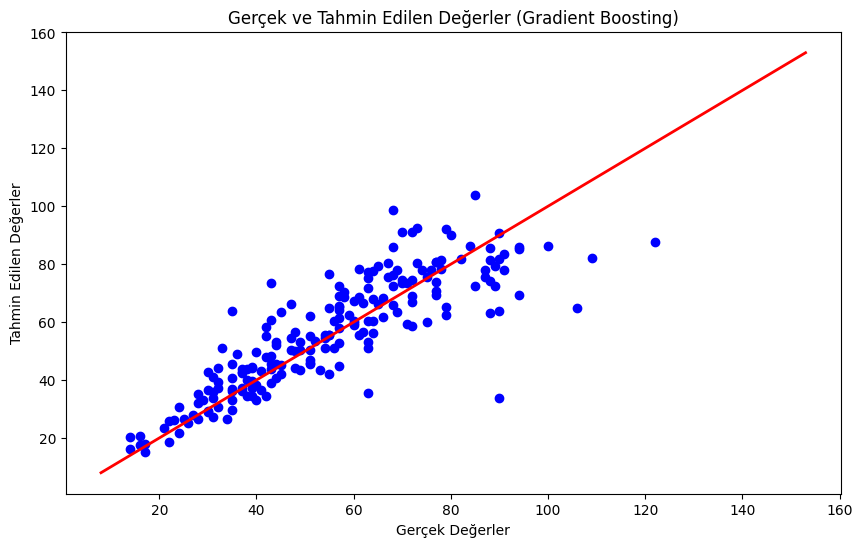

In [ ]:
# Tahmin ve gerçek değerlerin karşılaştırılması
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Ideal doğrusal çizgi
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Gerçek ve Tahmin Edilen Değerler (Gradient Boosting)")
plt.show()
